# Low variance features 
- **Low variance feature contain less information** and generally do not improve model performance
- hence, dropping low variance features is one of the options in feature selection
- In this notebook:
    1. Plot the correlation between feature importance and variance to see if the low variance feature indeed are less important
    2. Experiment with dropping eliminating low variance features one by one to observe the change in model performance

In [5]:
import pyforest
import seaborn as sb

# Kaggle-Playground-Series-May-2021

In [6]:
# there are 41 features and 1 categorical target variable
path = r"C:\Users\tanch\Documents\GitHub\Kaggle-Playground-Series-May-2021\Input\train.csv\train.csv"
df = pd.read_csv(path,index_col=0)
df.head()

<IPython.core.display.Javascript object>

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [7]:
# map the target variable to numeric numbers
target_mapping = {'Class_2':2,
                  'Class_1':1,
                 'Class_3':3,
                 'Class_4':4,}
df.target = df.target.map(target_mapping)

In [8]:
# split features and target variables
X = df.iloc[:,:-1]
y = df.target

# Observating the correlation between feature importance and variance
- train 10 catboost models with random parameters and plot the feature importances against variance

In [11]:
from catboost import CatBoostClassifier, Pool
import random

In [54]:
num_models = 10
correlation_values = []

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

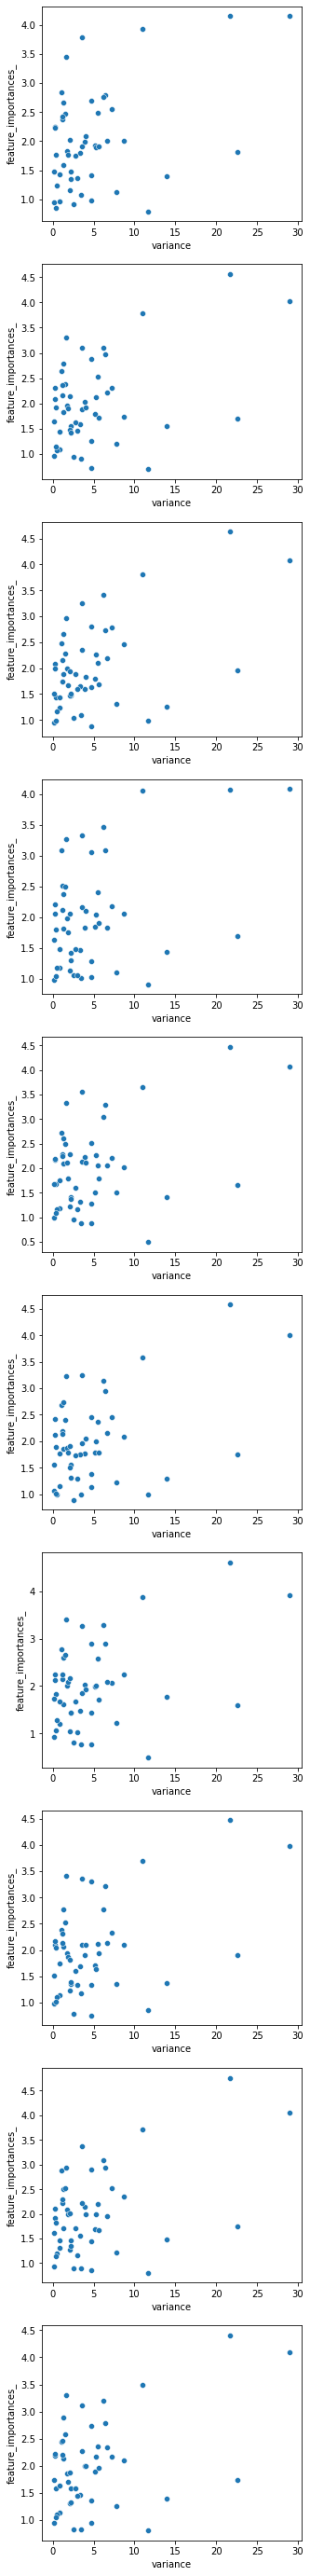

In [55]:
f, axes = plt.subplots(num_models, 1, figsize=(5,5*num_models))
for i in range(num_models):
    # this produces random hyperparameter grids
    random_grid = {'iterations' : 300,
                   'grow_policy' : 'SymmetricTree',
                   'task_type' : 'GPU',
                   'early_stopping_rounds' : 2,
                   'learning_rate': random.sample(list(np.random.uniform(0.1,0.2,20)),1)[0],        
                   'depth': random.sample(list(range(4,11)),1)[0],
                   'l2_leaf_reg': random.sample(list(range(5,15)),1)[0]}
    model = CatBoostClassifier(iterations = random_grid['iterations'],
                               grow_policy = random_grid['grow_policy'],
                               task_type = random_grid['task_type'],
                               early_stopping_rounds = random_grid['early_stopping_rounds'],
                               learning_rate = random_grid['learning_rate'],
                               l2_leaf_reg = random_grid['l2_leaf_reg'])
    model.fit(X,y,logging_level = "Silent")
    variances = np.var(X).values
    importances = model.feature_importances_
    correlation_values.append(np.corrcoef(np.var(X).values,model.feature_importances_)[0,1])
    temp_df = pd.DataFrame({"variance":variances , "feature_importances_":importances})
    sb.scatterplot(data = temp_df, x = 'variance',y = "feature_importances_", ax = axes[i])

In [56]:
print("Average Pearson's Correlation between variance and feature importance:", sum(correlation_values)/len(correlation_values))

Average Pearson's Correlation between variance and feature importance: 0.42862653091708924


## Observation
- Based on scatter plots and average pearson's correlation, we can see that variance is **linearly correlated to feature importance to a moderate extent**
- i.e. lower variance features tend to contain less information and be lower in feature importance 
- However, it is not always the case. We can see from the plots there there are instances that suggests otherwise - low variance features can have rather high importance

# Experiment with eliminating low variance features one by one
- instantiate 10 catboost models with random parameters
- for each model eliminate the lowest variance features one by one while evaluating the model on each iteration 

In [57]:
import random
from catboost import CatBoostClassifier, Pool
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from collections import defaultdict

In [58]:
X = df.iloc[:,:-1]
y = df.target
trainSet,testSet = train_test_split(df, train_size = 0.7, stratify = df.target)
train_X, train_y = trainSet.iloc[:,:-1],trainSet.target
test_X, test_y = testSet.iloc[:,:-1],testSet.target

In [67]:
testScores = defaultdict(list)

In [68]:
for i in range(5):
    
    # this produces random hyperparameter grids
    random_grid = {'iterations' : 300,
                   'grow_policy' : 'SymmetricTree',
                   'task_type' : 'GPU',
                   'early_stopping_rounds' : 2,
                   'learning_rate': random.sample(list(np.random.uniform(0.1,0.2,20)),1)[0],        
                   'depth': random.sample(list(range(4,11)),1)[0],
                   'l2_leaf_reg': random.sample(list(range(5,15)),1)[0]}
    
    # get feature importances for that particular grid
    ascending_variance = np.var(train_X).sort_values().keys()

    # iteratively ignore more features starting from least important features 
    for num_ignored in range(0,int(len(train_X.columns)/3)):
        ignored_features = list(ascending_variance[:num_ignored])
        model = CatBoostClassifier(iterations = random_grid['iterations'],
                                   grow_policy = random_grid['grow_policy'],
                                   task_type = random_grid['task_type'],
                                   early_stopping_rounds = random_grid['early_stopping_rounds'],
                                   learning_rate = random_grid['learning_rate'],
                                   l2_leaf_reg = random_grid['l2_leaf_reg'],
                                   ignored_features = ignored_features)
        model.fit(train_X, train_y, logging_level = "Silent")                                    # train on training set
        pred = model.predict_proba(test_X)                              # predict test set
        logloss = log_loss(test_y,pred)
        testScores['model_'+str(i)].append(logloss)       # record test logloss/performance
        print('model_'+str(i),num_ignored,logloss)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_0 0 1.0938199076477158
model_0 1 1.0948015604528616
model_0 2 1.095049358458917
model_0 3 1.0974097130600278
model_0 4 1.0972921206020565
model_0 5 1.0985698351336803
model_0 6 1.0994485832460728
model_0 7 1.099531973949554
model_0 8 1.0997355620262685
model_0 9 1.1005556505140917
model_0 10 1.1014735147235524
model_0 11 1.1015947596241022
model_0 12 1.1020543027108263
model_0 13 1.102379043511379
model_0 14 1.1029508617642612
model_0 15 1.1030204013339286


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_1 0 1.0936668201423283
model_1 1 1.094385007372451
model_1 2 1.0948095576285948
model_1 3 1.097109814633865
model_1 4 1.0976186433981734
model_1 5 1.0986956830474846
model_1 6 1.098823311017988
model_1 7 1.0995843795423508
model_1 8 1.1002145939802996
model_1 9 1.100373028228842
model_1 10 1.1010182493814447
model_1 11 1.1020990829424502
model_1 12 1.1018179342208034
model_1 13 1.1032443301167951
model_1 14 1.1034824428461503
model_1 15 1.103420866390037


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_2 0 1.093046384917686
model_2 1 1.0942474336927726
model_2 2 1.095622247658344
model_2 3 1.0968474732600662
model_2 4 1.0969578355728318
model_2 5 1.0986036910748957
model_2 6 1.0994940298035607
model_2 7 1.0993654553783223
model_2 8 1.0999233916728512
model_2 9 1.1005121676439844
model_2 10 1.1008570521332848
model_2 11 1.1015312935461412
model_2 12 1.1025431999808784
model_2 13 1.102579317595498
model_2 14 1.103674407629812
model_2 15 1.103485963258719


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_3 0 1.0929095846378836
model_3 1 1.0936309790450105
model_3 2 1.0939173386074594
model_3 3 1.095648105850788
model_3 4 1.0965559408376881
model_3 5 1.0979593120509412
model_3 6 1.098118604644731
model_3 7 1.0983847739169723
model_3 8 1.0989250938266928
model_3 9 1.099532091663839
model_3 10 1.0994296783205166
model_3 11 1.1003334639573215
model_3 12 1.1009800977456434
model_3 13 1.1011656518943294
model_3 14 1.1024556141333726
model_3 15 1.1027935268348432


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model_4 0 1.0921923577210175
model_4 1 1.0933293673451536
model_4 2 1.093887833050348
model_4 3 1.0954335639126342
model_4 4 1.096285335846374
model_4 5 1.0968307375319828
model_4 6 1.09756854123235
model_4 7 1.0982618024559103
model_4 8 1.0985172469878093
model_4 9 1.0987014762792906
model_4 10 1.0995477013396464
model_4 11 1.0996558612748553
model_4 12 1.1003208757938474
model_4 13 1.100812206823157
model_4 14 1.1020851638222744
model_4 15 1.1023917340281146


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

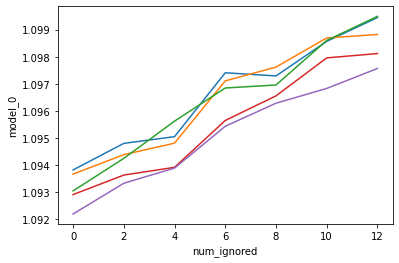

In [70]:
# plotting logloss against number of least important features ignored
info_df = pd.concat([pd.DataFrame(testScores,index = range(0,16)),pd.Series(range(0,len(X.columns)-2,2), name = 'num_ignored')],axis=1)
for col_ in info_df.columns[:-1]:
    sb.lineplot(data = info_df.iloc[:-17], y = col_, x = 'num_ignored')

# Observations:
- **Dropping low variance features doesn't necessarily lead to improved performance**. Because have low variance does not always mean that the feature is irrelevant